## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df=pd.read_csv('data/StudentsPerformance_edit.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'city'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   city                         1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# EDA

##  Check and Plot Missing Value

<AxesSubplot:>

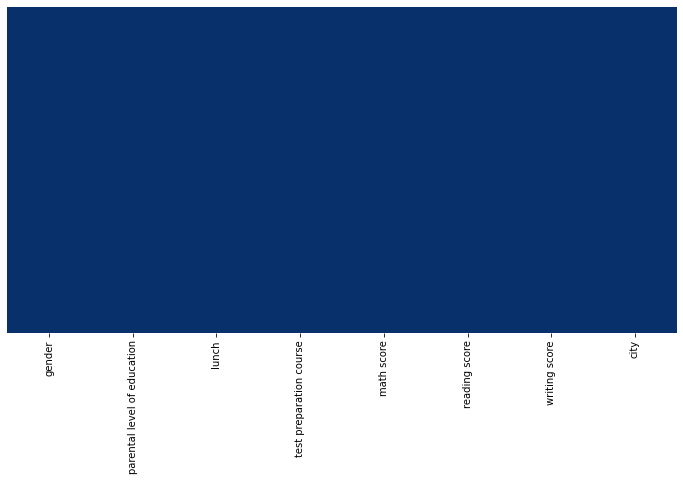

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),cmap='Blues_r',yticklabels=False,cbar=False)

In [6]:
#define feature in dataset
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'city'],
      dtype='object')

## Categorical Feature Plot

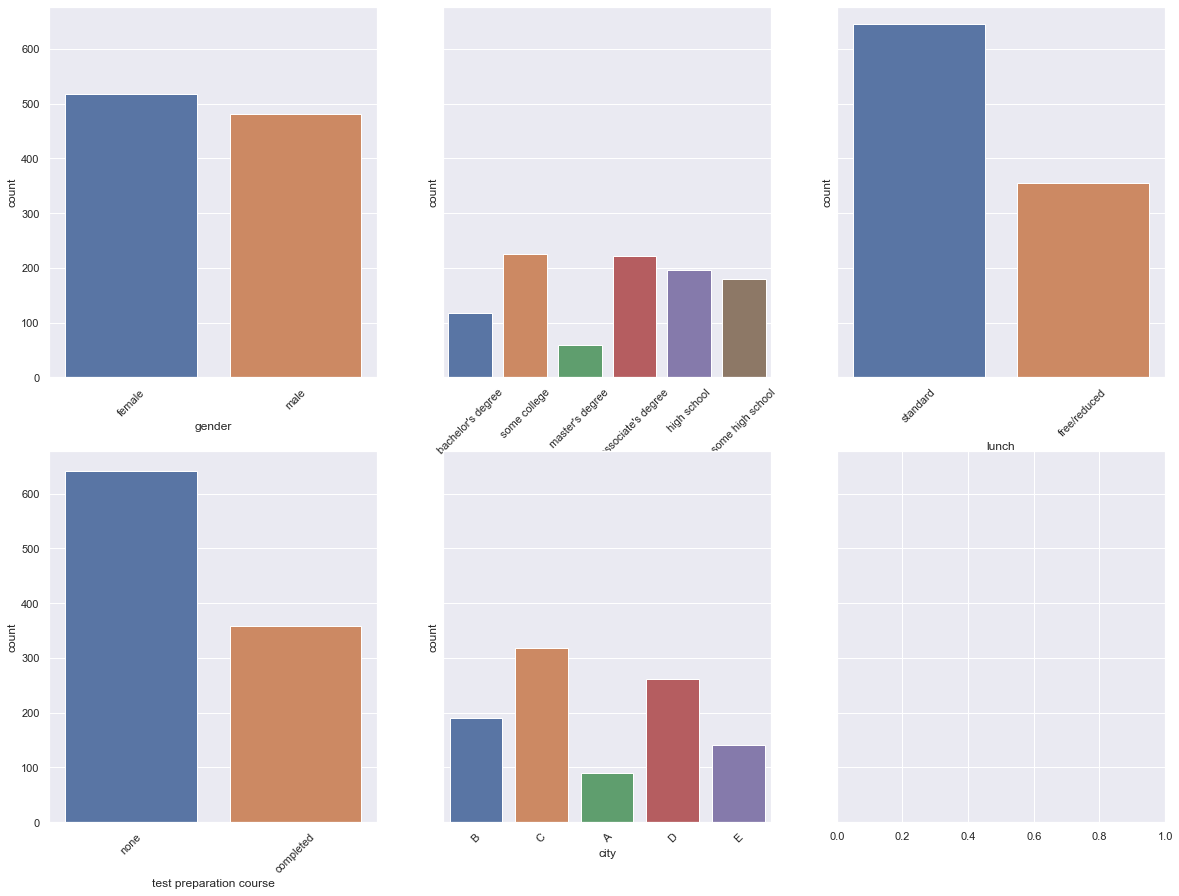

In [7]:
sns.set_theme(style='darkgrid')
cat=['gender', 'parental level of education', 'lunch','test preparation course','city']
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(20,15),sharey=True)
for col,axe in zip(cat,ax.flatten()):
    y=sns.countplot(data=df,x=col,ax=axe)
    y.set_xticklabels(y.get_xticklabels(),rotation=45)
    

### Gender vs City Plot

<AxesSubplot:xlabel='gender', ylabel='count'>

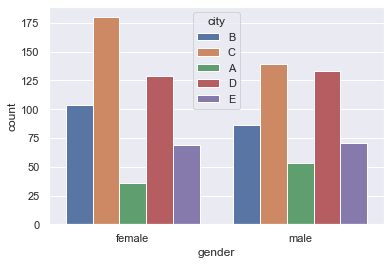

In [8]:
sns.countplot(data=df,x='gender',hue='city')

### Parential Level Of Education vs City

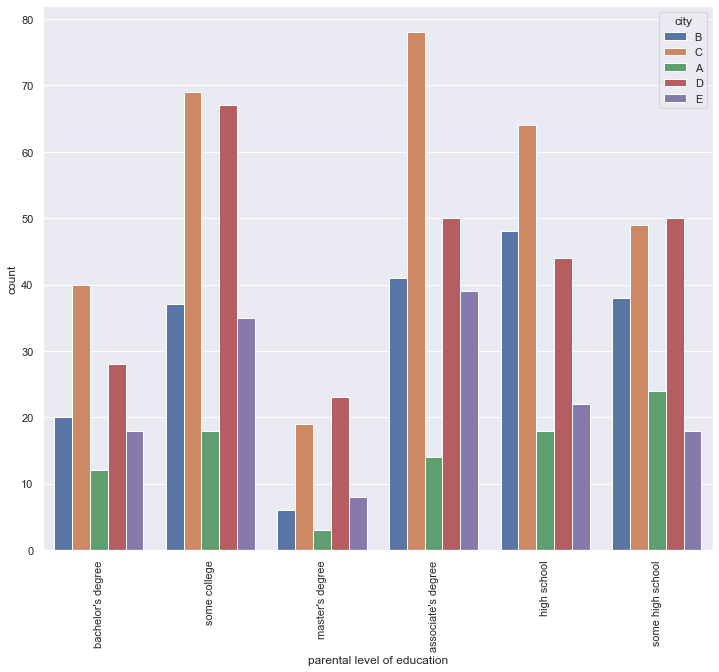

In [9]:
plt.figure(figsize=(12,10))
y=sns.countplot(data=df,hue='city',x= 'parental level of education')
y.set_xticklabels(y.get_xticklabels(),rotation=90);

The Higest Number of bachelor's degree come from city C <br>
The Higest Number of some college come from city C and D <br>
The Higest Number of master's degree come from city D <br>
The Higest Number of assosiate's degree come from city C <br>
The Higest Number of high school come from city C <br>
The Higest Number of some high school come from city C

<AxesSubplot:xlabel='lunch', ylabel='count'>

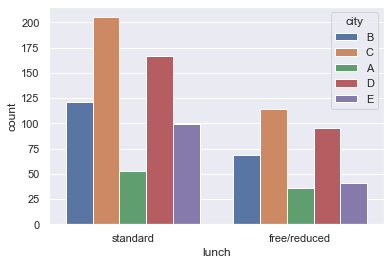

In [10]:
sns.countplot(x='lunch',hue='city',data=df)

-Number of standard lunch in every city is higher than free lunch <br>
-In city A is just slight difference between these two 

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

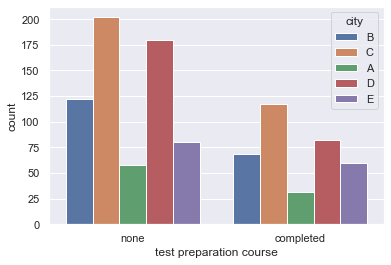

In [11]:
sns.countplot(x='test preparation course',hue='city',data=df)

Students in every city are commonly didn't complete the preraration test

## Numeric

In [12]:
numeric=df.columns[-4:-1]
numeric

Index(['math score', 'reading score', 'writing score'], dtype='object')

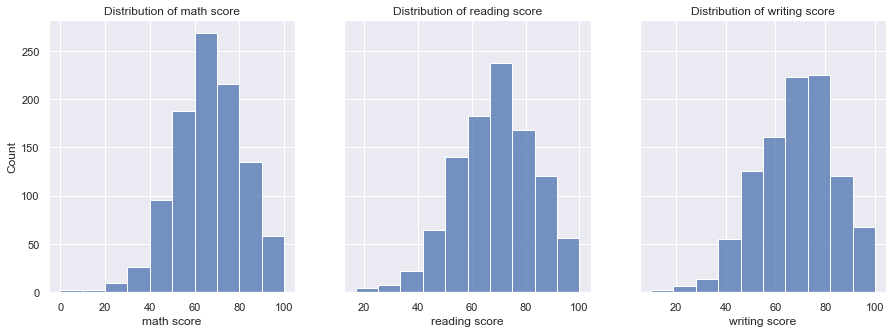

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True)
for i,j in zip (numeric,ax.flatten()):
    plot=sns.histplot(df[i],bins=10,ax=j)
    plot.set_title(f'Distribution of {i}')

The Distribution of Math, Reading, and Writing Score is almost Normal Distribution

## Numeric vs Categoric

C:\Users\Dofi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dofi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='gender'>

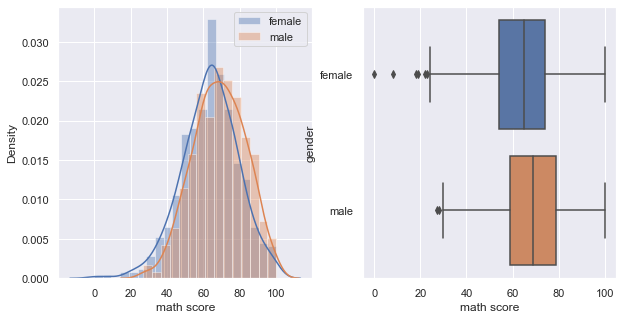

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(a=df['math score'][df.gender=='female'],label='female')
sns.distplot(a=df['math score'][df.gender=='male'],label='male')
plt.legend()
plt.subplot(122)
sns.boxplot(data=df,y='gender',x='math score')

The mean of math score for male is higher than female 

C:\Users\Dofi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dofi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dofi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='reading score', ylabel='gender'>

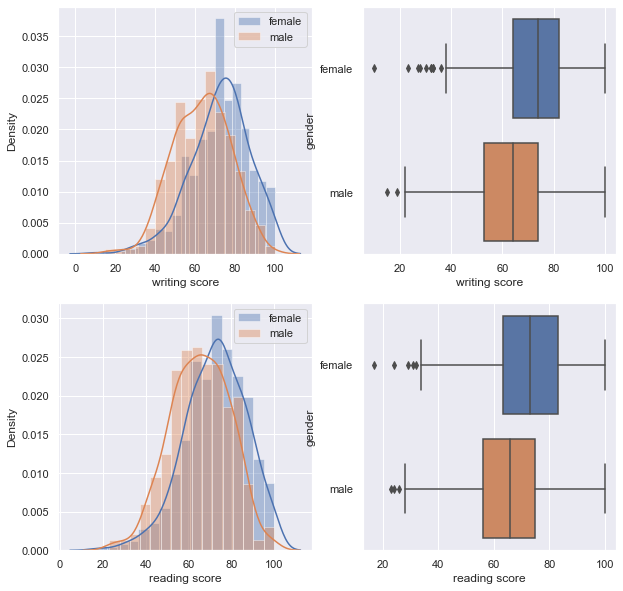

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(a=df['writing score'][df.gender=='female'],label='female')
sns.distplot(a=df['writing score'][df.gender=='male'],label='male')
plt.legend()
plt.subplot(222)
sns.boxplot(data=df,y='gender',x='writing score')
#plt.figure(figsize=(10,5))
plt.subplot(223)

sns.distplot(a=df['reading score'][df.gender=='female'],label='female')
sns.distplot(a=df['reading score'][df.gender=='male'],label='male')
plt.legend()
plt.subplot(224)
sns.boxplot(data=df,y='gender',x='reading score')


The Mean of Reading and Writing Score for Female is Higher than Male

### City vs Math, Reading, and Writing Score

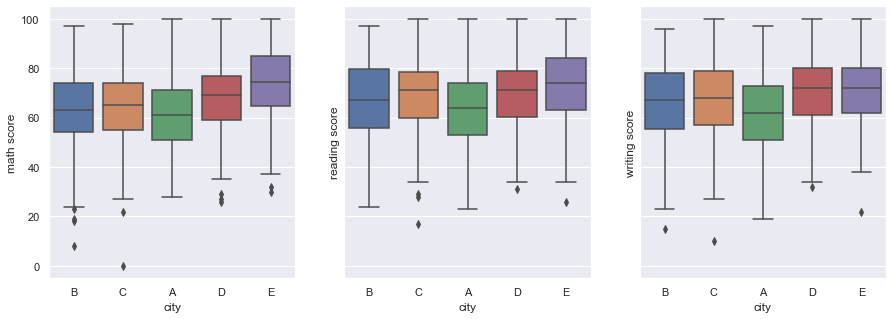

In [16]:
numeric
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5),sharey=True)
for index,ax in zip(numeric,ax.flatten()):
    g=sns.boxplot(x='city',y=index,data=df,ax=ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=0)

city E have the higest mean for math score, reading score and writing score <br>
city A have the lowest mean for math score, reading score and writing score

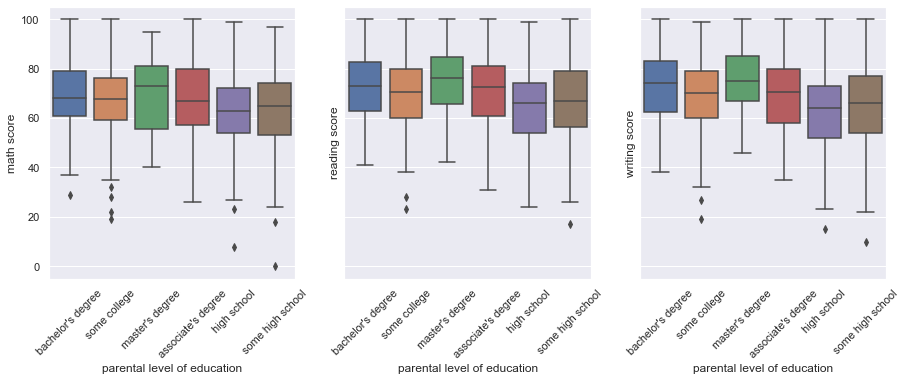

In [17]:
numeric
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5),sharey=True)
for index,ax in zip(numeric,ax.flatten()):
    g=sns.boxplot(x='parental level of education',y=index,data=df,ax=ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)

Parential level of education for master's degree have the higest mean for reading and writing score <br>
Parential level  of education for high scholl degree have the lowest mean for reading and writing score <br>
Based on this data we can conclude that parential level of education has relation between reading and writing score but not in math score 

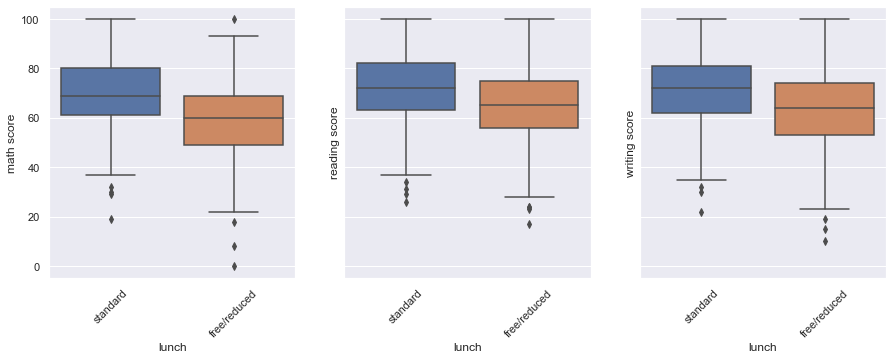

In [18]:
numeric
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5),sharey=True)
for index,ax in zip(numeric,ax.flatten()):
    g=sns.boxplot(x='lunch',y=index,data=df,ax=ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)

Student who have standard lunch tend to get higher score then who have free/reduced lunch

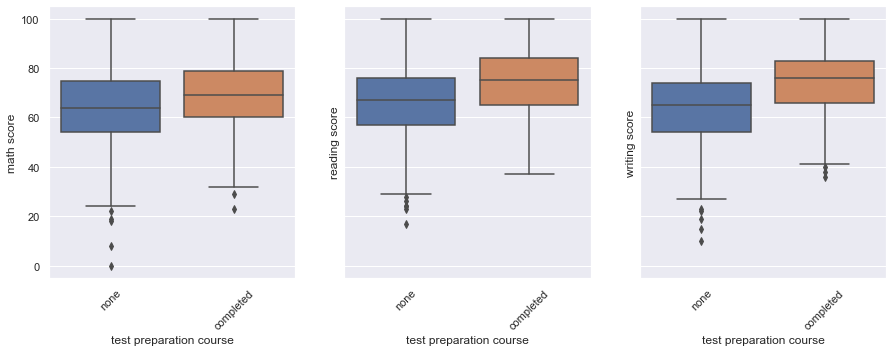

In [19]:
numeric
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5),sharey=True)
for index,ax in zip(numeric,ax.flatten()):
    g=sns.boxplot(x='test preparation course',y=index,data=df,ax=ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)

Student who completed test preparation course tend to get higher score then who didn't complete

## Clustering > KMeans

### I try find an insight from this data by clustering numerical columns (math,reading,and writing) using KMeans

In [75]:
X=df[['math score','reading score', 'writing score']]

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Finding the best number of cluster using elbow analysis

In [22]:
X=df[['math score', 'reading score','writing score']]

Text(0.5, 1.0, 'Elbow Analysis')

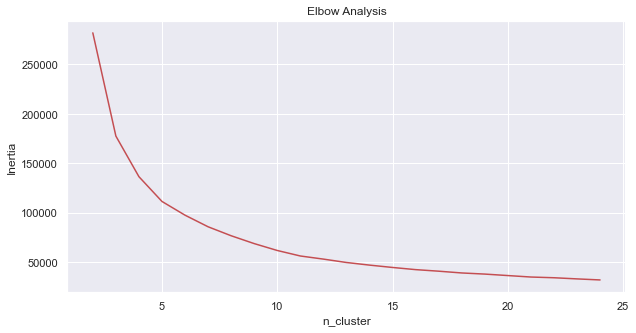

In [27]:
score=[]
for i in range(2,25):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    label=kmeans.predict(X)
    score.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2,25),score,'r-')
plt.xlabel('n_cluster')
plt.ylabel('Inertia')
plt.title('Elbow Analysis')

From the plot above in my opinion the best number of cluster based on elbow analysis are 5 and 10 because we can't see the there is no significant intertia value decrease after these two <br>
We will conduct sillihoutte score analysis to choose which one will be the best 

#### silhouette_score

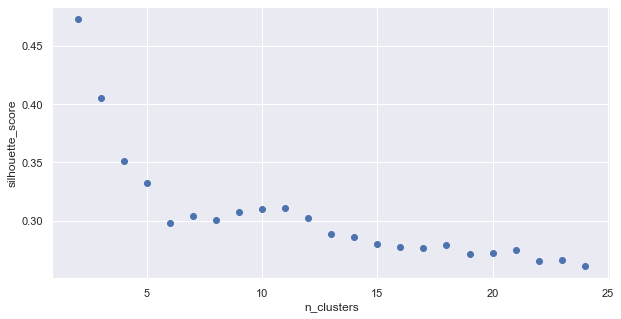

In [30]:
score=[]
for i in range(2,25):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    member=kmeans.predict(X)
    sillhouette=silhouette_score(X,member)
    score.append(sillhouette)
plt.figure(figsize=(10,5))
plt.scatter(range(2,25),score)
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score');

from the plot above we can conclude that number of cluster = 5 is better than number cluster = 10 <br> So we will using number of cluster = 5 in this clustering

#### KMenas n_cluster=5

In [31]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
label=kmeans.predict(X)

####  Cluster Centers (DPR) Analysis

In [33]:
dpr=pd.DataFrame(kmeans.cluster_centers_,columns=['math_score','reading_score','writing_score'])
dpr

,math_score,reading_score,writing_score
0,64.103896,67.198052,66.623377
1,87.251799,90.618705,90.215827
2,52.717489,54.865471,52.896861
3,74.860294,78.525735,77.382353
4,36.189655,39.344828,37.068966


Form the cluster center we can interpret the cluster center as value index <br>
Where cluster 0 = C <br>
Where cluster 1 = A <br>
Where cluster 2 = D <br>
Where cluster 3 = B <br>
Where cluster 4 = E


#### Add value_Index into data_frame

In [34]:
df['value_index']=label
def value_index(x):
    if x==0:
        return 'C'
    elif x==1:
        return 'A'
    elif x==2:
        return 'D'
    elif x==3:
        return 'B'
    elif x==4:
        return 'E'
df['value_index']=df.value_index.apply(value_index)
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,city,value_index
0,female,bachelor's degree,standard,none,72,72,74,B,B
1,female,some college,standard,completed,69,90,88,C,B
2,female,master's degree,standard,none,90,95,93,B,A
3,male,associate's degree,free/reduced,none,47,57,44,A,D
4,male,some college,standard,none,76,78,75,C,B


<AxesSubplot:xlabel='value_index', ylabel='count'>

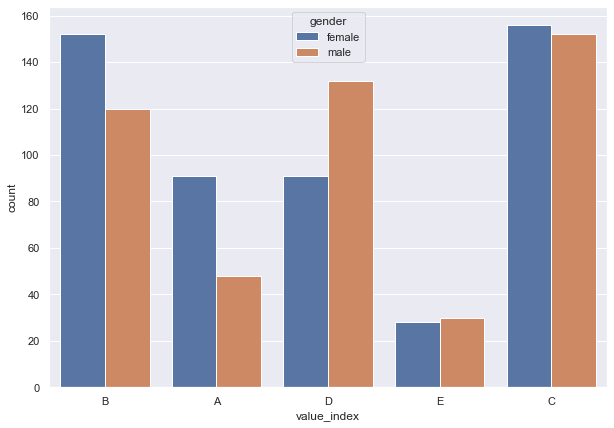

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='value_index',hue='gender')

Value Index A and B dominate by famele <br>
Value Index D dominate by male <br>
value indes C an E is balanced 